In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [26]:
theta = 3
alpha = 0.1
dat = []
for oo in range(0, 10):
    res = alpha * 2 * theta #update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta**2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [27]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


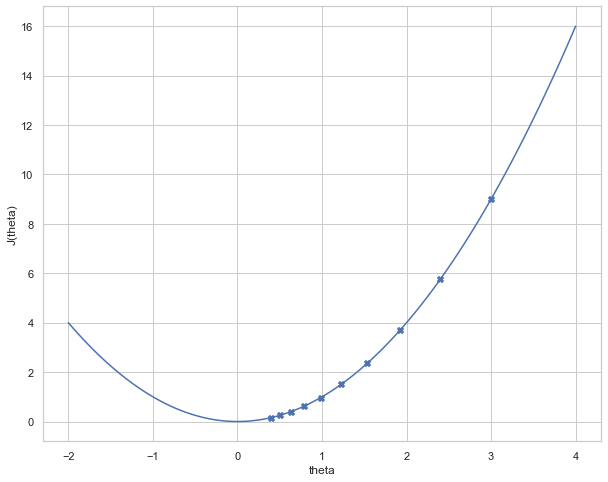

In [28]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');



In [29]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0, 10):
    res = alpha * (4 * theta**3 + 2 * theta) #update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta**2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [30]:
tmp = pd.DataFrame(dat)
tmp


,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


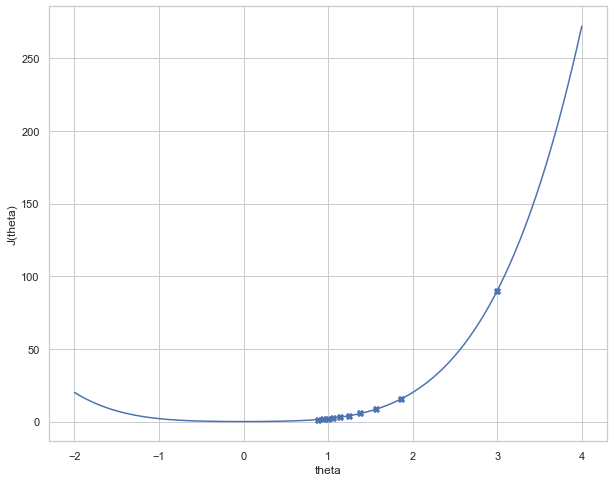

In [31]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**4 + np.linspace(-2, 4, 100)**2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

In [32]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()



C:\Users\talha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
X = df[['RM']].values
y = boston_data.target

In [34]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()



In [35]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

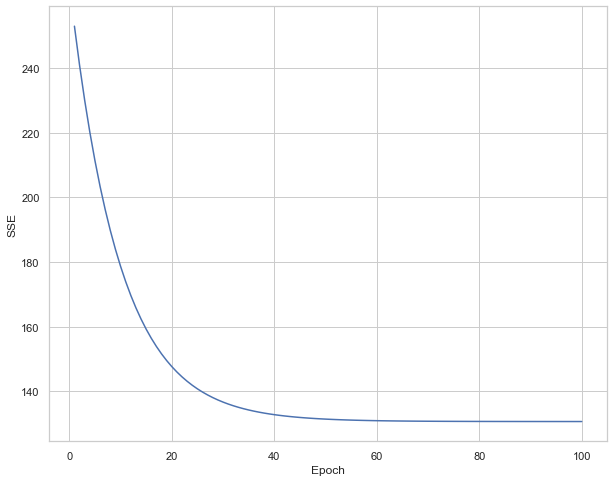

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE'); #sums of sqaured errors
plt.xlabel('Epoch');



In [38]:

def polyFeatures(X, p):
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    #column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm  




In [39]:


degree = 8



In [41]:
def plotFit(X, y, degree, num_points, reg = 0):
    X_poly = polyFeatures(X, degree)[1]
    starting_theta = np.ones((X_poly.shape[1], 1))
    opt_theta = optimalTheta(starting_theta, X_poly, y, reg)
    x_range = np.linspace(-55, 50, num_points)
    x_range_poly = np.ones((num_points, 1))
    x_range_poly = np.insert(x_range_poly, x_range_poly.shape[1], x_range.T, axis = 1)
    x_range_poly = polyFeatures(x_range_poly, len(starting_theta)-2)[0]
    y_range = x_range_poly @ opt_theta
    plotData(X, y)
    plt.plot(x_range, y_range, "--", color = "blue", label = "Polynomial regression fit")
    plt.title('Polynomial Regression Fit: No Regularization')
    if reg != 0:
        plt.title('Polynomial Regression Fit: Lambda = {0}'.format(reg))
    plt.legend()
    

In [46]:
plotFit(X ,y, degree, 1000)

IndexError: index 1 is out of bounds for axis 1 with size 1